In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [21]:
import xarray as xr

In [4]:
fpath = "../imgs/full_masterskp_NSAMP1_img_20.fz"

In [84]:
fits.info(fpath)

def load_fits_np( fpath ):
    data = []
    with fits.open( fpath ) as f:
        for i, hdu in enumerate(f):
            if hdu.data is not None:
                data.append( xr.DataArray(
                    name = f"hdu{len(data)}",
                    data = hdu.data,
                    dims = ["row", "col"],
                    attrs = { key: (hdu.header[key], hdu.header.comments[key]) for key in hdu.header.keys() }
                ))
    return data

da = load_fits_np(fpath)
da[0]

Filename: ../imgs/full_masterskp_NSAMP1_img_20.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    172   (400, 600)   int32   
  2  COMPRESSED_IMAGE    1 CompImageHDU    168   (400, 600)   int32   
  3  COMPRESSED_IMAGE    1 CompImageHDU    168   (400, 600)   int32   
  4  COMPRESSED_IMAGE    1 CompImageHDU    168   (400, 600)   int32   


<xarray.DataArray 'hdu0' (row: 600, col: 400)>
array([[-578, -597, -284, ...,  -77,  106,  -38],
       [-183,   34,    8, ...,   58,  101,  305],
       [ -56,   86,  227, ...,   87,  172,   45],
       ...,
       [ -24,  184,  119, ...,  242,  -16,   96],
       [ 309,   84,  152, ...,   88,   15,  169],
       [  56,  112,  201, ...,   89,  263,   74]], dtype=int32)
Dimensions without coordinates: row, col
Attributes:
    SIMPLE:                     (True, 'file does conform to FITS standard')
    BITPIX:                     (32, 'number of bits per data pixel')
    NAXIS:                      (2, 'number of data axes')
    NAXIS1:                     (400, 'length of data axis 1')
    NAXIS2:                     (600, 'length of data axis 2')
    PCOUNT:                     (0, 'size of special data area')
    GCOUNT:                     (1, 'one data group (required keyword)')
    XTENSION:                   ('BINTABLE', 'binary table extension')
    COMMENT:                    (  FITS (Flexible Image Transport System) for...
    CCDNCOL:                    ('512', 'Smart sequencer variable')
    CCDNPRES:                   ('7', 'Smart sequencer variable')
    CCDNROW:                    ('1024', 'Smart sequencer variable')
    EXPOSURE:                   ('0', 'Smart sequencer variable')
    NBINCOL:                    ('1', 'Smart sequencer variable')
    NBINROW:                    ('1', 'Smart sequencer variable')
    NCOL:                       ('400', 'Smart sequencer variable')
    NROW:                       ('600', 'Smart sequencer variable')
    NSAMP:                      ('1', 'Smart sequencer variable')
    SKIPCOL:                    ('0', 'Smart sequencer variable')
    SKIPROW:                    ('0', 'Smart sequencer variable')
    TOG_VDD:                    ('1', 'Smart sequencer variable')
    TOG_VR:                     ('0', 'Smart sequencer variable')
    DELAY_H_AFTER:              ('2', 'Smart sequencer variable')
    DELAY_H_OVERLAP:            ('150', 'Smart sequencer variable')
    DELAY_INTEG_PED:            ('340', 'Smart sequencer variable')
    DELAY_INTEG_SIG:            ('235', 'Smart sequencer variable')
    DELAY_RG_WIDTH:             ('15', 'Smart sequencer variable')
    DELAY_RG_AFTER:             ('5', 'Smart sequencer variable')
    DELAY_SW_AFTER:             ('5', 'Smart sequencer variable')
    DELAY_SWHIGH:               ('8', 'Smart sequencer variable')
    DELAY_V_OVERLAP:            ('300', 'Smart sequencer variable')
    DELAY_EXPOSE:               ('15000000', 'Smart sequencer variable')
    DELAY_INTEG_AFTER_SW_HIGH:  ('4', 'Smart sequencer variable')
    DELAY_OG_LOW:               ('15', 'Smart sequencer variable')
    V1AH:                       ('-0.500', 'Internal variable')
    V1AL:                       ('-2.500', 'Internal variable')
    V1BH:                       ('-0.500', 'Internal variable')
    V1BL:                       ('-2.500', 'Internal variable')
    V2CH:                       ('-0.500', 'Internal variable')
    V2CL:                       ('-2.500', 'Internal variable')
    V3AH:                       ('-0.500', 'Internal variable')
    V3AL:                       ('-2.500', 'Internal variable')
    V3BH:                       ('-0.500', 'Internal variable')
    V3BL:                       ('-2.500', 'Internal variable')
    H1AH:                       ('-2.000', 'Internal variable')
    H1AL:                       ('-4.500', 'Internal variable')
    H1BH:                       ('-2.000', 'Internal variable')
    H1BL:                       ('-4.500', 'Internal variable')
    H2CH:                       ('-2.000', 'Internal variable')
    H2CL:                       ('-4.500', 'Internal variable')
    H3AH:                       ('-2.000', 'Internal variable')
    H3AL:                       ('-4.500', 'Internal variable')
    H3BH:                       ('-2.000', 'Internal variable')
    H3BL:                       ('-4.500', 'Internal variabl

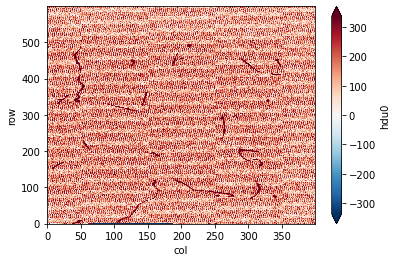

In [85]:
da[0].plot.imshow(robust=True)

(array([2.39999e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-129832. ,  693287.8, 1516407.6, 2339527.4, 3162647.2, 3985767. ,
        4808886.8, 5632006.6, 6455126.4, 7278246.2, 8101366. ]),
 <BarContainer object of 10 artists>)

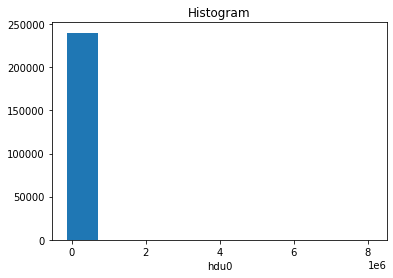

In [56]:
da[0].plot.hist()

In [78]:
np.nonzero( da[0] == da[0].max() )

<xarray.DataArray 'hdu0' (row: 2, col: 1)>
array([[  1],
       [119]])
Dimensions without coordinates: row, col

In [75]:
np.nonzero( da[0] == da[0].min() )

<xarray.DataArray 'hdu0' (row: 2, col: 1)>
array([[  0],
       [302]])
Dimensions without coordinates: row, col

In [76]:
da[0][0,302] = np.nan

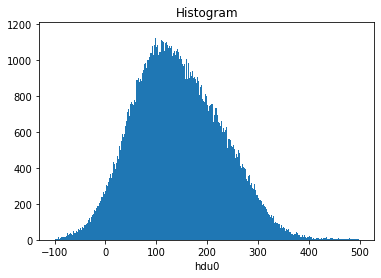

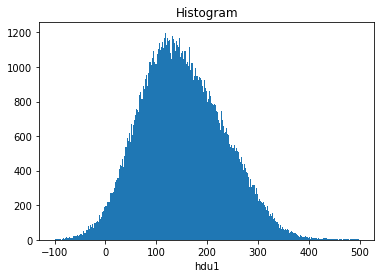

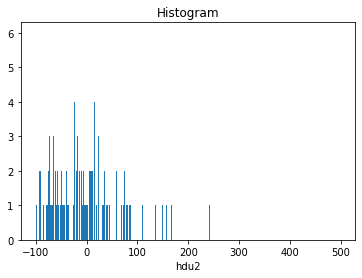

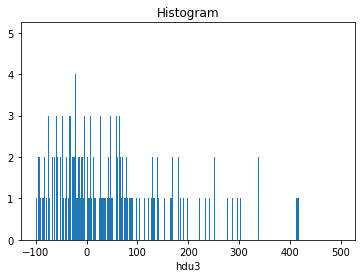

In [82]:
for d in da:
    d.plot.hist(bins=np.arange(-100,500,1))
    plt.show()

In [72]:
np.nonzero( da[1] == da[1].max() )

(<xarray.DataArray 'hdu1' (row: 2, col: 1)>
 array([[  0],
        [302]])
 Dimensions without coordinates: row, col, <xarray.DataArray 'hdu1' ()>
 array(7986420, dtype=int32)
 Attributes:
     XTENSION:                   IMAGE
     BITPIX:                     32
     NAXIS:                      2
     NAXIS1:                     400
     NAXIS2:                     600
     PCOUNT:                     0
     GCOUNT:                     1
     CCDNCOL:                    512
     CCDNPRES:                   7
     CCDNROW:                    1024
     EXPOSURE:                   0
     NBINCOL:                    1
     NBINROW:                    1
     NCOL:                       400
     NROW:                       600
     NSAMP:                      1
     SKIPCOL:                    0
     SKIPROW:                    0
     TOG_VDD:                    1
     TOG_VR:                     0
     DELAY_H_AFTER:              2
     DELAY_H_OVERLAP:            150
     DELAY_INTEG_PED:

In [64]:
np.nonzero( da[2] == da[2].max() )

<xarray.DataArray 'hdu2' (row: 2, col: 1)>
array([[  0],
       [302]])
Dimensions without coordinates: row, col